f(0.455) = 19.914591387939467
f(0.553) = 8.714362170693104


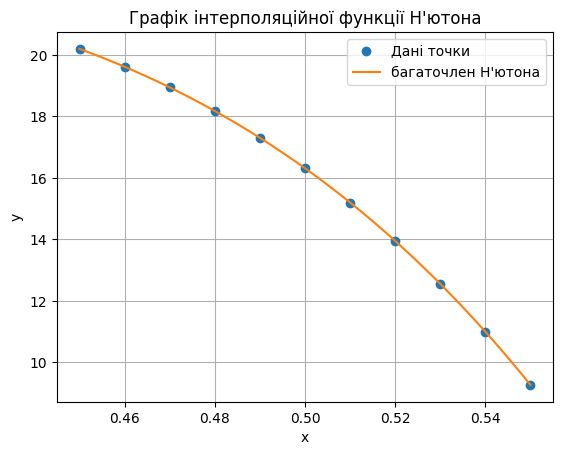

In [23]:
import numpy
import matplotlib.pyplot as plt

x = numpy.array ([i*0.01 for i in range(45, 56)])
y = numpy.array([20.1946, 19.6133, 18.9425, 18.1746, 17.301, 16.3123, 15.1984, 13.9484, 12.5508, 10.993, 9.2647])

def first_interpolation(x, y, x0):
  n = len(x)
  f = numpy.zeros((n, n))
  f[:, 0] = y
  for j in range(1, n):
    for i in range(n - j):
      f[i, j] = (f[i+1, j-1] - f[i, j-1]) / (x[i+j] - x[i])
  res = 0
  for j in range(n):
    prod = f[0, j]
    for i in range(j):
      prod *= (x0 - x[i])
    res += prod
  return res


def second_interpolation(x, y, x0):
  n = len(x)
  f = numpy.zeros((n, n))
  f[:, 0] = y
  for j in range(1, n):
    for i in range(n - j):
      f[i, j] = (f[i+1, j-1] - f[i, j-1]) / (x[i+j] - x[i])
      res = f[0, 0]
  for j in range(1, n):
    prod = f[0, j]
    for i in range(j):
      prod *= (x0 - x[i])
    res += prod
  return res

x1 = 0.455
x2 = 0.553

y1 = first_interpolation(x, y, x1)
y2 = second_interpolation(x, y, x2)

print(f"f({x1}) = {y1}")
print(f"f({x2}) = {y2}")

x_graph = numpy.linspace(numpy.min(x), numpy.max(x), 100)
y_graph = numpy.zeros_like(x_graph)

for i in range(len(x_graph)):
  y_graph[i] = second_interpolation(x, y, x_graph[i])

plt.plot(x, y, "o", label="Дані точки")
plt.plot(x_graph, y_graph, label="багаточлен Н'ютона")
plt.title("Графік інтерполяційної функції Н'ютона")

plt.xlabel("x")
plt.ylabel("y")

plt.legend()
plt.grid(True)

plt.show()